PRACTISE

In [24]:
# Exploratory Data Analysis (EDA) 

## Module 1: Introduction to Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('countymurders.csv')

print(df.head())
print(df.info())


   rownames  arrests  countyid  density  popul  perc1019  perc2029  percblack  \
0         1      2.0      1001    54.05  32216     20.63     15.28      22.33   
1         2      3.0      1001    53.66  31984     20.19     15.55      22.07   
2         3      2.0      1001    53.75  32036     19.66     15.73      21.80   
3         4      7.0      1001    53.78  32056     19.10     15.88      21.53   
4         5      3.0      1001    53.91  32128     18.54     15.92      21.26   

   percmale  rpcincmaint  ...  rpcunemins  year  murders  murdrate  \
0     40.25       167.67  ...       29.16  1980        2  0.620810   
1     40.36       167.99  ...       43.92  1981        1  0.312656   
2     40.42       166.63  ...       71.41  1982        3  0.936446   
3     40.47       176.53  ...       72.22  1983        7  2.183679   
4     40.51       166.25  ...       40.36  1984        2  0.622510   

   arrestrate  statefips  countyfips  execs    lpopul  execrate  
0    0.620810          1  

In [25]:
## Module 2: Data Transformation

print("Before deduplication:", len(df))
df = df.drop_duplicates()
print("After deduplication:", len(df))

print(df.replace(-1, np.nan, inplace=True))

df['density_bin'] = pd.cut(df['density'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])




Before deduplication: 37349
After deduplication: 37349
None


count    37349.000000
mean         0.508202
std          0.851044
min          0.000000
25%          0.000000
50%          0.241044
75%          0.735294
max         39.840640
Name: murdrate, dtype: float64


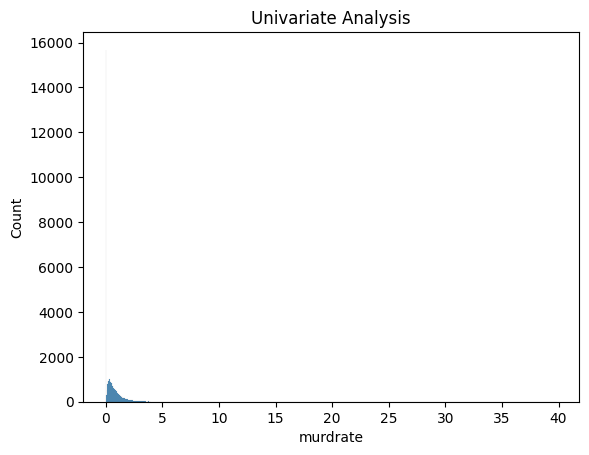

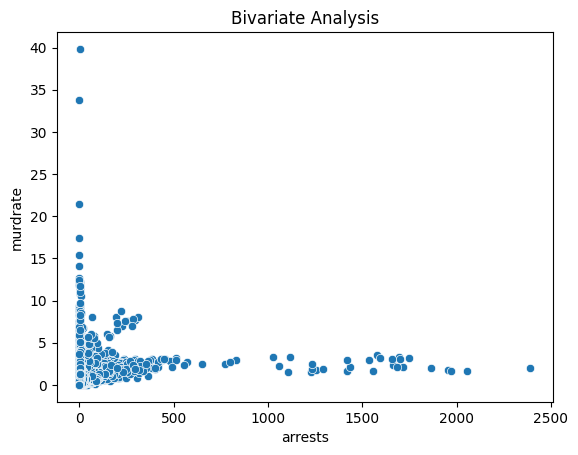

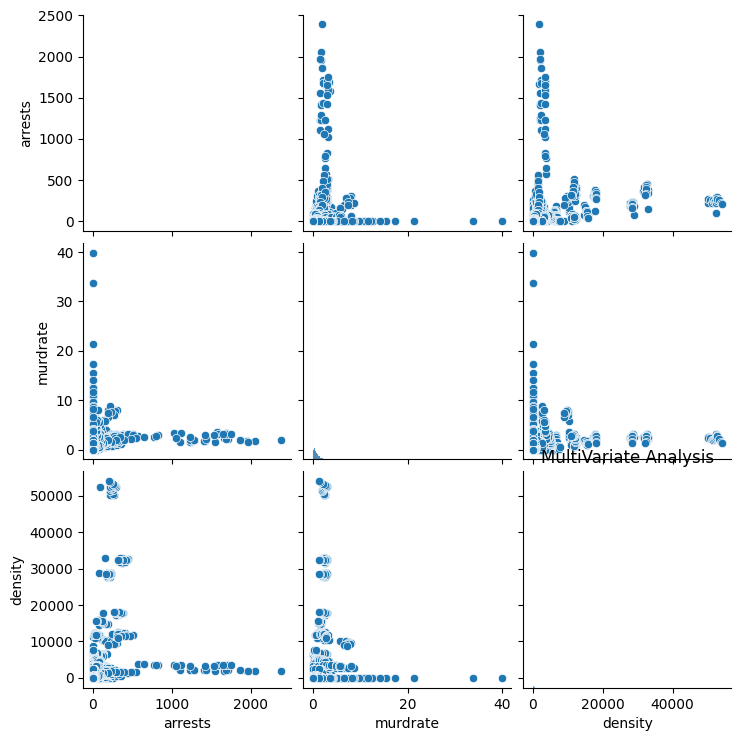

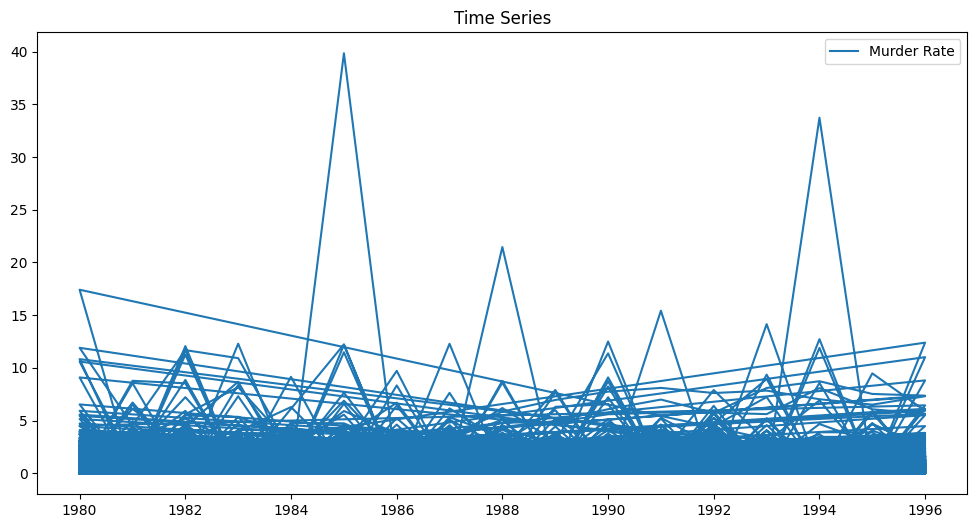

In [26]:
## Module 3: Correlation Analysis and Time Series Analysis


print(df['murdrate'].describe())
sns.histplot(df['murdrate'])
plt.title("Univariate Analysis")
plt.show()

sns.scatterplot(x='arrests', y='murdrate', data=df)
plt.title("Bivariate Analysis")
plt.show()

sns.pairplot(df[['arrests', 'murdrate', 'density']])
plt.title("MultiVariate Analysis")
plt.show()

# Time Series Analysis

df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['murdrate'], label='Murder Rate')
plt.title("Time Series")
plt.legend()
plt.show()


           rownames       arrests      countyid       density         popul  \
count  37349.000000  36845.000000  37349.000000  37349.000000  3.734900e+04   
mean   18675.000000      6.782250  32921.927173    252.241067  8.934354e+04   
std    10781.871939     50.128657  15528.352966   1663.768484  2.718545e+05   
min        1.000000      0.000000   1001.000000      0.050000  8.500000e+01   
25%     9338.000000      0.000000  20105.000000     17.681580  1.314400e+04   
50%    18675.000000      1.000000  36065.000000     44.240000  2.879200e+04   
75%    28012.000000      3.000000  48049.000000    106.600000  6.648000e+04   
max    37349.000000   2391.000000  56045.000000  54058.770000  9.127751e+06   

           perc1019      perc2029     percblack      percmale   rpcincmaint  \
count  37349.000000  37349.000000  37349.000000  37349.000000  37346.000000   
mean      15.582640     14.584615      7.823194     43.350958    165.450844   
std        1.973399      3.696407     13.287067    

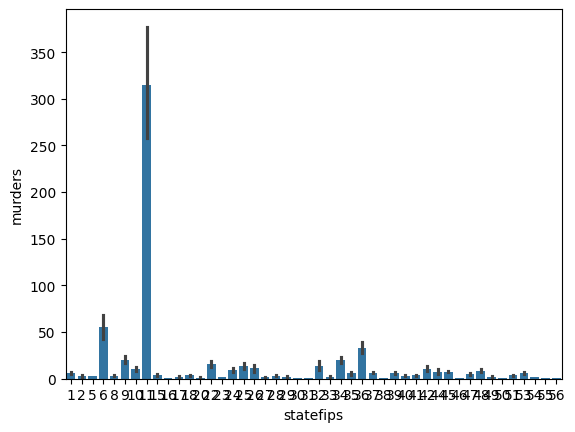

In [27]:
## Module 4: Data Summarization and Visualization

print(df.describe())

print("Mean of murders:", df['murders'].mean())

contingency_table = pd.crosstab(df['statefips'], df['murdrate'])
print(contingency_table)

df['arrests'] = pd.to_numeric(df['arrests'], errors='coerce')
df['murdrate'] = pd.to_numeric(df['murdrate'], errors='coerce')

sns.barplot(x='statefips', y='murders', data=df)
plt.show()



In [30]:
df = df[['murdrate', 'arrests']].dropna()


In [31]:
df['arrests'] = pd.to_numeric(df['arrests'], errors='coerce')
df['murdrate'] = pd.to_numeric(df['murdrate'], errors='coerce')


c:\Users\manul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


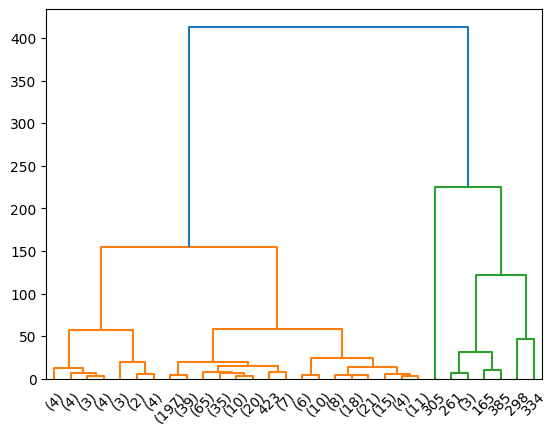

            murdrate  arrests
year                         
1983-01-01  2.183679      7.0
1981-01-01  2.424830      2.0
1983-01-01  2.016454      3.0
1988-01-01  2.701729      9.0
1993-01-01  1.889135      8.0
...              ...      ...
1984-01-01  1.902588      0.0
1992-01-01  3.941663      1.0
1993-01-01  1.930875      0.0
1994-01-01  3.702332      0.0
1982-01-01  1.972776      1.0

[1842 rows x 2 columns]


In [32]:
## Module 5: Clustering Algorithms

from sklearn.cluster import KMeans, SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

df_sampled = df[['murdrate', 'arrests']].sample(n=500, random_state=42)

sc = SpectralClustering(n_clusters=3, affinity='rbf', n_neighbors=10)
df_sampled['spectral_cluster'] = sc.fit_predict(df_sampled)

linkage_matrix = linkage(df_sampled, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=30) 
plt.show()

outliers = df[df['murdrate'] > df['murdrate'].quantile(0.95)]
print(outliers)





In [33]:
## Module 6: Dimensionality Reduction

from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap

df = df[['murdrate', 'arrests']].dropna()


df['murdrate'].fillna(df['murdrate'].mean(), inplace=True)
df['arrests'].fillna(df['arrests'].mean(), inplace=True)




C:\Users\manul\AppData\Local\Temp\ipykernel_19300\2606586123.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['murdrate'].fillna(df['murdrate'].mean(), inplace=True)
C:\Users\manul\AppData\Local\Temp\ipykernel_19300\2606586123.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [34]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['murdrate', 'arrests']])
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [9.99721408e-01 2.78591508e-04]


c:\Users\manul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


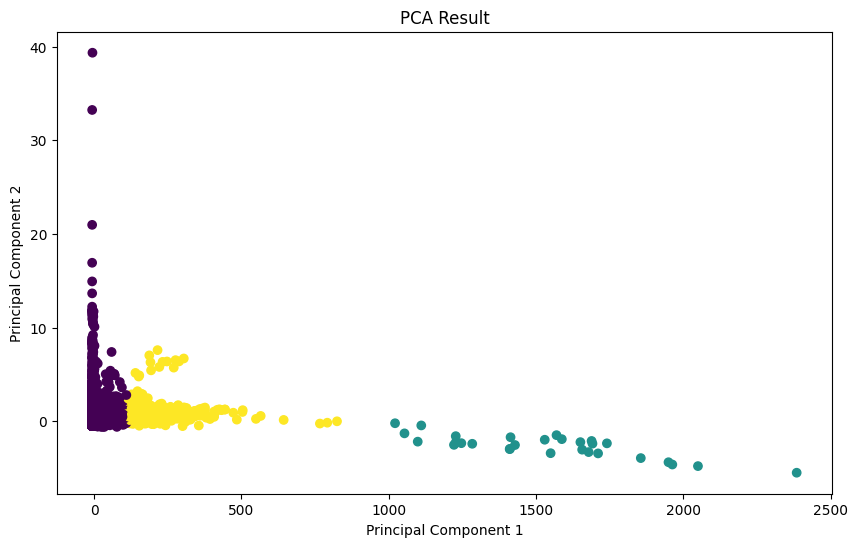

In [39]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
features = df[['murdrate', 'arrests']]
kmeans = KMeans(n_clusters=3)
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
df['cluster'] = kmeans.fit_predict(features)
# Visualize PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='viridis')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error: 0.6211882613606674
R-Squared: 0.03232706100157334
Mean Absolute Error: 0.5026296057636492


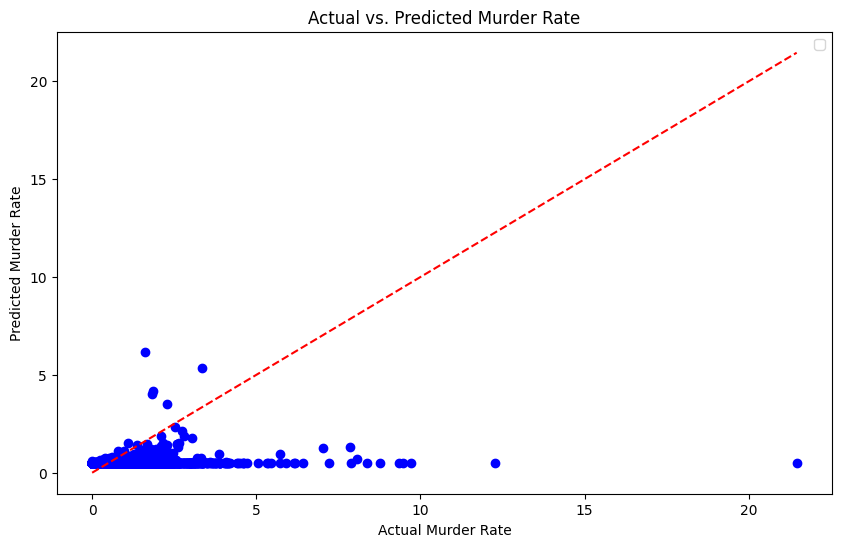

In [ ]:
## Module 7: Model Development and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


X = df[['arrests']]
y = df['murdrate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")
print(f"Mean Absolute Error: {mae}")


# Visualization of Regression Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Actual Murder Rate')
plt.ylabel('Predicted Murder Rate')
plt.title('Actual vs. Predicted Murder Rate')
plt.legend()
plt.show()